### IMPORT

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestClassifier

### READING AND CLEANING

In [218]:
def Cleaning_function(path):
    
    df = pd.read_csv(path)
    
    df.loc[df.hauteurarbre == 'de 10 m à 20 m', 'hauteurarbre'] = 15
    df.loc[df.hauteurarbre == 'Moins de 10 m', 'hauteurarbre'] = 5
    df.loc[df.hauteurarbre == 'Plus de 20 m','hauteurarbre'] = 25
    df[['lat', 'long']] = df.geo_point_2d.str.split(",", expand = True).astype(float)
    
    to_drop = ['intituleprotectionplu','typeimplantationplu','traitementchenilles','genre','genre_desc','categorie','categorie_desc',
           'equipe','courrier','identifiantplu','identifiantplu','anneeabattage','essouchement','diametrearbre','causeabattage','remarques','raisondeplantation',
           'variete','stationmetro','structure','forme','typenature','portarbre','geo_point_2d']
    
    df_res = df.dropna(subset='anneedeplantation', inplace=True)
    df_res = df.drop(columns = to_drop)
    
    df_res.sous_categorie = df_res.sous_categorie.str[3:].astype('int64')
    df_res.code_parent = df_res.code_parent.str[3:].astype('int64')
    df_res.bien_reference = df_res.bien_reference.str[2:].astype('int64')
    df_res.code = df_res.code.str[3:].astype('int64')
    df_res.nom = df_res.nom.str[2:].astype('int64')


    
    
    df_res.to_pickle('C:/Users/eduard.vlasov/Documents/GitHub/ML/Data/cleaned_data_arbres.pkl')
    
    return df_res

In [219]:
path = 'C:/Users/eduard.vlasov/Documents/GitHub/ML/Data/arbres_grenoble_epsg4326.csv'
df_res = Cleaning_function(path)

In [150]:
df_res

,elem_point_id,code,nom,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,stadededeveloppement,anneedeplantation,collectivite,hauteurarbre,lat,long
0,5259,11324,11324,151,Arbre de voirie,175,Av J O Poterne rond point,5,11324,Robinia,pseudoacacia,Arbre adulte,1975.0,Grenoble Alpes Métropole,NaN,45.175674,5.749421
1,1478,27796,27796,151,Arbre de voirie,175,Av J O Poterne rond point,5,27796,Acer,campestre,Arbre adulte,1975.0,Grenoble Alpes Métropole,NaN,45.175689,5.749450
2,13139,4323,4323,174,Arbre d'espaces ouverts,1009,Av J O caisse d'épargne,5,4323,Fraxinus,americana,Arbre adulte,1975.0,Grenoble Alpes Métropole,15,45.175403,5.748483
3,24132,7132,7132,174,Arbre d'espaces ouverts,1009,Av J O caisse d'épargne,5,7132,Fraxinus,americana,Arbre adulte,1975.0,Ville de Grenoble,15,45.175424,5.748558
4,23970,15162,15162,174,Arbre d'espaces ouverts,625,R M Riollet cité rouge,5,15162,Prunus,avium,Arbre adulte,2009.0,Ville de Grenoble,5,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,18164,27355,27355,151,Arbre de voirie,915,Allée des Romantiques pair,6,27355,Betula,utilis,Arbre adulte,2011.0,Grenoble Alpes Métropole,15,45.166626,5.725421
31732,18170,27356,27356,151,Arbre de voirie,215,Ave La Bruyère pair,6,27356,Pyrus,calleryana,Arbre jeune,2004.0,Grenoble Alpes Métropole,15,45.166508,5.724994
31733,18173,27357,27357,151,Arbre de voirie,544,R Pupin Ma Oisans à R François,6,27357,Platanus,acerifolia,Arbre adulte,1976.0,Grenoble Alpes Métropole,15,45.164310,5.723866
31734,18179,27358,27358,151,Arbre de voirie,917,R Pupin du tunnel à Esmonin,6,27358,Platanus,acerifolia,Arbre adulte,1976.0,Ville de Grenoble,15,45.160543,5.723836


In [970]:
# sns.heatmap(df.isnull(), cbar=False)
# df.columns[df.isna().sum()>10000]
# df.loc[:, df.columns[df.isna().sum()>10000]].describe()

Index(['variete', 'equipe', 'remarques', 'raisondeplantation',
       'traitementchenilles', 'courrier', 'identifiantplu',
       'typeimplantationplu', 'intituleprotectionplu', 'anneeabattage',
       'essouchement', 'diametrearbre', 'causeabattage', 'stationmetro',
       'hauteurarbre', 'portarbre', 'forme', 'typenature'],
      dtype='object')

### VISIO

In [81]:
#read cleaned csv
path='C:/Users/eduard.vlasov/Documents/GitHub/ML/Data/cleaned_data_arbres.pkl'
df_res = pd.read_pickle(path)

df_res.describe()

,elem_point_id,code,nom,sous_categorie,sous_categorie_desc,code_parent,adr_secteur,bien_reference,espece,anneedeplantation,collectivite,hauteurarbre,lat,long
count,30144.00000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000,30144.000000
mean,19142.18186,20209.518976,20209.518976,158.107285,1.423799,2937.558386,3.828722,20209.518976,130.754279,1990.018644,0.523786,12.773686,45.177280,5.727445
std,11824.16903,11164.956377,11164.956377,28.018516,0.695504,8408.419032,1.706830,11164.956377,93.790599,17.992314,0.512296,5.575086,0.011999,0.012782
min,1.00000,1428.000000,1428.000000,65.000000,0.000000,7.000000,1.000000,1428.000000,0.000000,1900.000000,0.000000,5.000000,45.151572,5.697915
25%,9180.75000,10667.750000,10667.750000,151.000000,1.000000,393.000000,2.000000,10667.750000,36.000000,1975.000000,0.000000,5.000000,45.166299,5.717668
50%,18469.50000,19910.500000,19910.500000,174.000000,1.000000,748.500000,4.000000,19910.500000,140.000000,1987.000000,1.000000,15.000000,45.175925,5.729491
75%,27800.25000,29194.250000,29194.250000,174.000000,2.000000,1093.000000,5.000000,29194.250000,219.000000,2006.000000,1.000000,15.000000,45.187461,5.737417
max,46658.00000,42115.000000,42115.000000,187.000000,3.000000,41178.000000,6.000000,42115.000000,274.000000,2022.000000,2.000000,25.000000,45.224825,5.798704


array([[<Axes: title={'center': 'anneedeplantation'}>]], dtype=object)

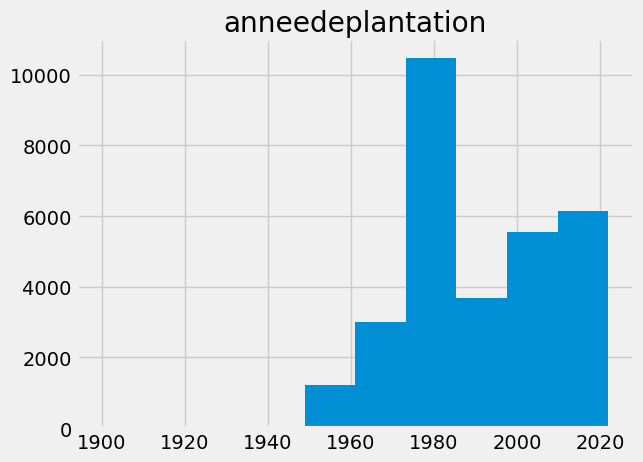

In [1106]:
#TOTAL BY THE YEAR
df_res.loc[:, ['anneedeplantation']].hist()

C:\Users\eduard.vlasov\AppData\Local\Temp\ipykernel_10968\2482591363.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_res["anneedeplantation"], color="b", label="Skewness : %.1f"%(df_res["anneedeplantation"].skew()))


<Axes: xlabel='anneedeplantation', ylabel='Density'>

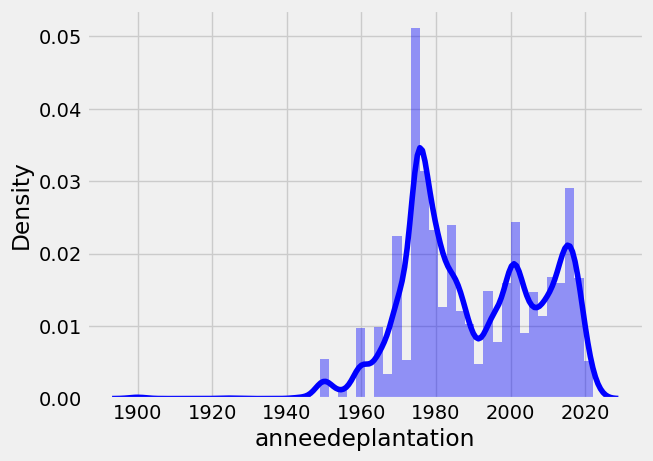

In [1107]:
sns.distplot(df_res["anneedeplantation"], color="b", label="Skewness : %.1f"%(df_res["anneedeplantation"].skew()))

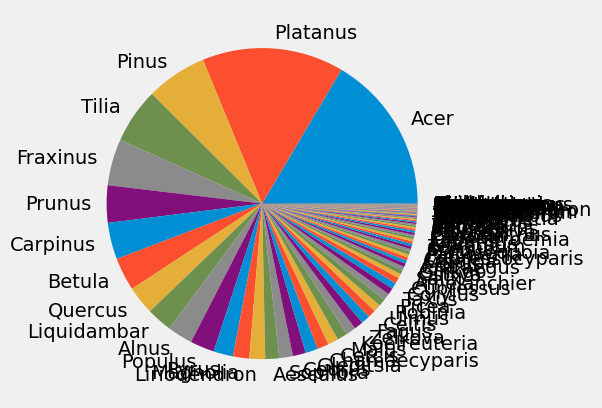

In [1108]:
#DOMINATION OF THE GENDER
data = df_res.genre_bota.value_counts().values
mylabels = df_res.genre_bota.value_counts().keys()


plt.pie(data, labels =mylabels)

plt.show() 

Text(0.5, 1.0, 'TOTAL PLANTED BY SOUS CATEGORIE')

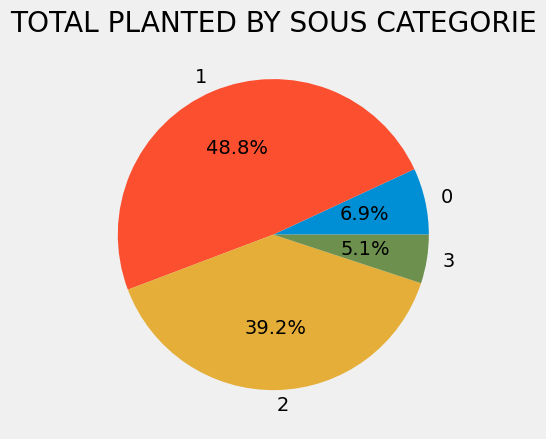

In [1109]:
#TOTAL PLANTED BY SOUS CATEGORIE
data = df_res.groupby('sous_categorie_desc')['anneedeplantation'].count()
plt.pie(data, labels =data.keys(), autopct='%1.1f%%')
plt.title('TOTAL PLANTED BY SOUS CATEGORIE')

Text(0.5, 1.0, 'TOTAL PLANTED BY AGE')

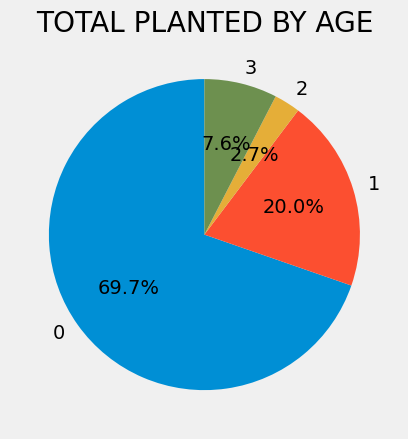

In [1110]:
#TOTAL PLANTED BY AGE
data = df_res.groupby('stadededeveloppement')['anneedeplantation'].count()
plt.pie(data,  labels = data.keys(), autopct='%1.1f%%', startangle=90)
plt.title('TOTAL PLANTED BY AGE')

In [1111]:
df_res.select_dtypes(include='number')

,elem_point_id,code,nom,sous_categorie,sous_categorie_desc,code_parent,adr_secteur,bien_reference,stadededeveloppement,anneedeplantation,hauteurarbre,lat,long
0,5259,11324,11324,151,2,175,5,11324,0,1975.0,15.0,45.175674,5.749421
1,1478,27796,27796,151,2,175,5,27796,0,1975.0,15.0,45.175689,5.749450
2,13139,4323,4323,174,1,1009,5,4323,0,1975.0,15.0,45.175403,5.748483
3,24132,7132,7132,174,1,1009,5,7132,0,1975.0,15.0,45.175424,5.748558
4,23970,15162,15162,174,1,625,5,15162,0,2009.0,5.0,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,18164,27355,27355,151,2,915,6,27355,0,2011.0,15.0,45.166626,5.725421
31732,18170,27356,27356,151,2,215,6,27356,1,2004.0,15.0,45.166508,5.724994
31733,18173,27357,27357,151,2,544,6,27357,0,1976.0,15.0,45.164310,5.723866
31734,18179,27358,27358,151,2,917,6,27358,0,1976.0,15.0,45.160543,5.723836


Text(0.5, 1.0, 'DEPENDENCES')

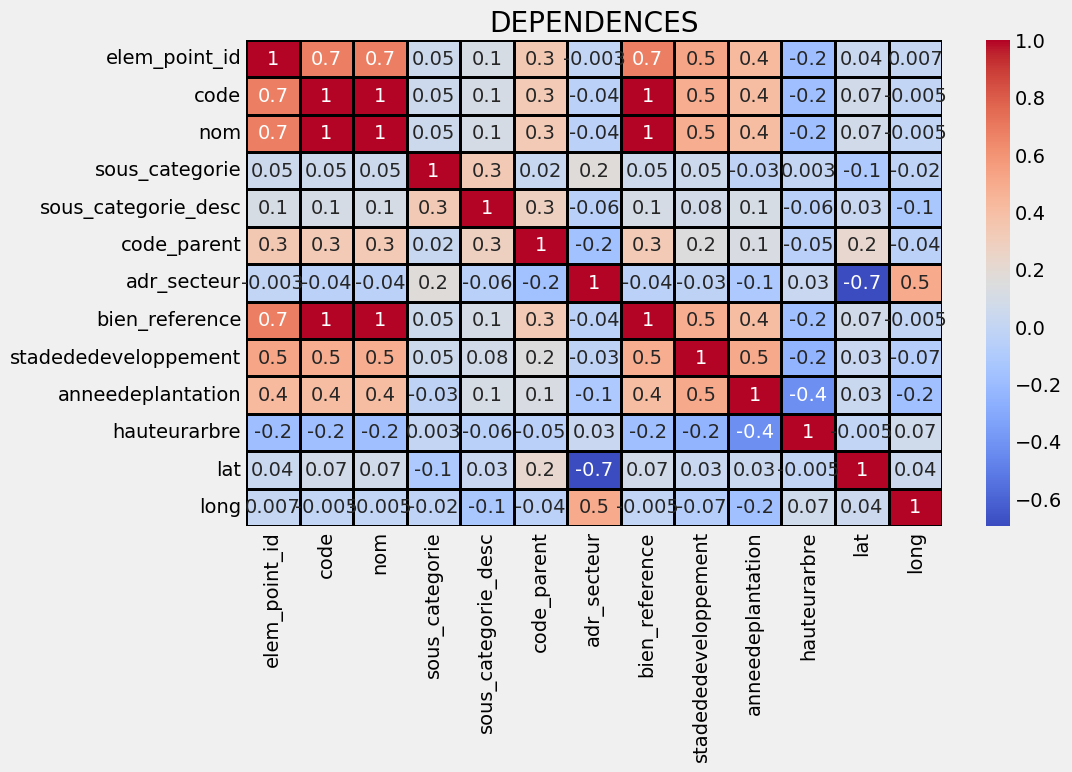

In [1112]:
plt.figure(figsize=(10,6))
dataplot = sns.heatmap(df_res.select_dtypes(include='number').corr(), annot=True, fmt='.1g', cmap= 'coolwarm', linecolor='black', linewidths=2)
plt.title('DEPENDENCES')

Text(0.5, 1.0, 'CONCENTRATION TREES BY THE COORDINATES')

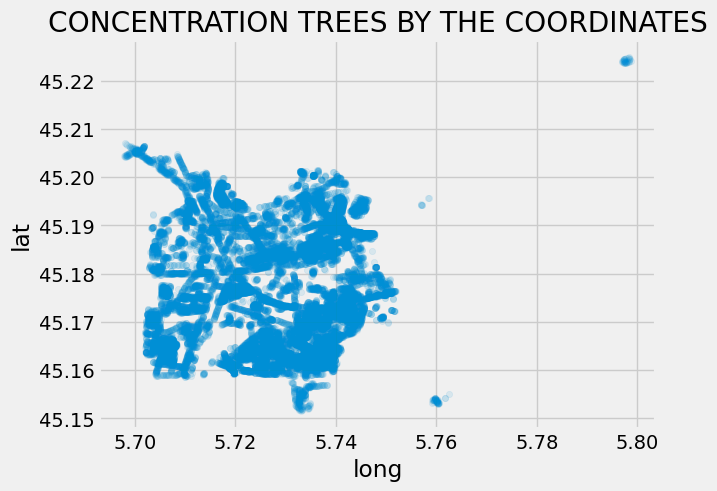

In [1113]:
df_res.plot(kind="scatter", x="long", y="lat", alpha=0.1)
plt.title('CONCENTRATION TREES BY THE COORDINATES')

### ITER 2

#### SELECT TRAIN TEST

In [220]:
# features = ['sous_categorie', 'sous_categorie_desc','adr_secteur', 'bien_reference', 'stadededeveloppement','hauteurarbre', 'lat', 'long']
# X = df_res.loc[:, features]
# y = df_res.loc[:, ['anneedeplantation']]
#SELECT TRAIN AND EST DATA

##!!!!!!!!!!!!!!!!!!! NEVER TOUCH TEST DATA !!!!!!!!!!!!!!!!!!!!!!

X  = df_res.loc[:, df_res.columns !=  'anneedeplantation']
y = df_res.loc[:, ['anneedeplantation']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

print(f'train subset of {len(X_train)} examples which are {len(X_train)/len(df_res)*100} % of all DATA')
print(f'test subset of {len(X_test)} examples which are {len(X_test)/len(df_res)*100} % of all DATA')


print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

train subset of 24115 examples which are 79.9993365180467 % of all DATA
test subset of 6029 examples which are 20.00066348195329 % of all DATA
Training Features Shape: (24115, 16)
Training Labels Shape: (24115, 1)
Testing Features Shape: (6029, 16)
Testing Labels Shape: (6029, 1)


#### Pipeline

In [266]:
num_attribs = X.select_dtypes(include=np.number).columns.to_list()
cat_attribs = X.select_dtypes(exclude=np.number).columns.to_list()


numerical_transformer  = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
])

categorical_transformer  = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor  = ColumnTransformer([
        ("numerical", numerical_transformer, num_attribs),
        ("categorical", categorical_transformer, cat_attribs)
])

pipeline_RandomForestClassifier = Pipeline([
        ('pre', preprocessor),
        ('clf', RandomForestClassifier())
])

pipeline_RandomForestRegressor = Pipeline([
        ('pre', preprocessor),
        ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
])

pipeline_LinearRegressor = Pipeline([
        ('pre', preprocessor),
        ('linear', LinearRegression())
])

In [260]:
X_train_pipeline_num = numerical_transformer.fit_transform(X_train.loc[:,num_attribs])
X_train_pipeline_cat = categorical_transformer.fit_transform(X_train.loc[:,cat_attribs])

X_test_pipeline_num = numerical_transformer.transform(X_test.loc[:,num_attribs])
X_test_pipeline_cat = categorical_transformer.transform(X_test.loc[:,cat_attribs])

In [269]:
pipeline_RandomForestClassifier.fit(X_train, y_train)

c:\Users\eduard.vlasov\AppData\Local\anaconda3\envs\arbres\Lib\site-packages\sklearn\base.py:1215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['elem_point_id', 'code',
                                                   'nom', 'sous_categorie',
                                                   'code_parent', 'adr_secteur',
                                                   'bien_reference', 'lat',
                                                   'long']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sous_categorie_desc',
                                                   'code_parent_desc',
                                                   'genre_bota', 'espece',
                                                   'stadededeveloppement',
                                                   'collectivite',
                                                   'hauteurarbre'])])),
                ('clf', RandomForestClassifier())])

In [297]:
pipeline_RandomForestClassifier.predict(X_test)

print('Training set accuracy RandomForestClassifier:', np.round(pipeline_RandomForestClassifier.score(X_train, y_train), 4))
print('Test set accuracy RandomForestClassifier:' , np.round(pipeline_RandomForestClassifier.score(X_test, y_test), 4))

Training set accuracy RandomForestClassifier: 1.0
Test set accuracy RandomForestClassifier: 0.9287


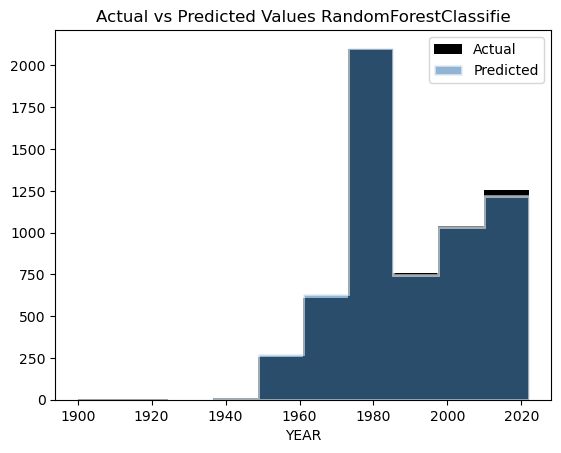

In [294]:
df_predict_RandomForestClassifier = pd.DataFrame({'Actual': y_test.anneedeplantation.to_numpy(), 'Predicted': pipeline_RandomForestClassifier.predict(X_test)})

plt.hist(df_predict_RandomForestClassifier['Actual'], label='Actual', alpha=1, color = 'black')
plt.hist(df_predict_RandomForestClassifier['Predicted'], label='Predicted',alpha=0.6, histtype='stepfilled', color='steelblue', edgecolor='white', linewidth=2)

plt.xlabel('YEAR')
plt.title('Actual vs Predicted Values RandomForestClassifie')
plt.legend()

plt.show()

In [267]:
pipeline_RandomForestRegressor.fit(X_train, y_train)

c:\Users\eduard.vlasov\AppData\Local\anaconda3\envs\arbres\Lib\site-packages\sklearn\base.py:1215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['elem_point_id', 'code',
                                                   'nom', 'sous_categorie',
                                                   'code_parent', 'adr_secteur',
                                                   'bien_reference', 'lat',
                                                   'long']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sous_categorie_desc',
                                                   'code_parent_desc',
                                                   'genre_bota', 'espece',
                                                   'stadededeveloppement',
                                                   'collectivite',
                                                   'hauteurarbre'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=10, random_state=2))])

In [298]:
pipeline_RandomForestRegressor.predict(X_test)

print('Training set accuracy RandomForestRegressor:', np.round(pipeline_RandomForestRegressor.score(X_train, y_train), 4))
print('Test set accuracy RandomForestRegressor:' , np.round(pipeline_RandomForestRegressor.score(X_test, y_test), 4))

Training set accuracy RandomForestRegressor: 0.8058
Test set accuracy RandomForestRegressor: 0.7846


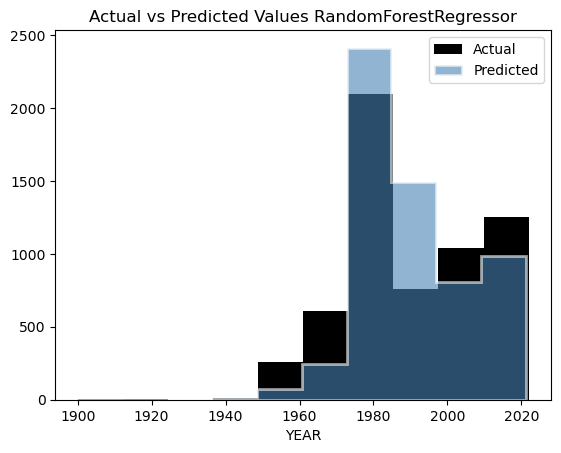

In [295]:
df_predict_RandomForestRegressor = pd.DataFrame({'Actual': y_test.anneedeplantation.to_numpy(), 'Predicted': pipeline_RandomForestRegressor.predict(X_test)})


plt.hist(df_predict_RandomForestRegressor['Actual'], label='Actual', alpha=1, color = 'black')
plt.hist(df_predict_RandomForestRegressor['Predicted'], label='Predicted',alpha=0.6, histtype='stepfilled', color='steelblue', edgecolor='white', linewidth=2)

plt.xlabel('YEAR')
plt.title('Actual vs Predicted Values RandomForestRegressor')
plt.legend()

plt.show()

In [272]:
pipeline_LinearRegressor.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['elem_point_id', 'code',
                                                   'nom', 'sous_categorie',
                                                   'code_parent', 'adr_secteur',
                                                   'bien_reference', 'lat',
                                                   'long']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sous_categorie_desc',
                                                   'code_parent_desc',
                                                   'genre_bota', 'espece',
                                                   'stadededeveloppement',
                                                   'collectivite',
                                                   'hauteurarbre'])])),
                ('linear', LinearRegression())])

In [301]:
pipeline_LinearRegressor.predict(X_test)

print('Training set accuracy LinearRegressor:', np.round(pipeline_LinearRegressor.score(X_train, y_train), 4))
print('Test set accuracy LinearRegressor:' , np.round(pipeline_LinearRegressor.score(X_test, y_test), 4))

Training set accuracy LinearRegressor: 0.8391
Test set accuracy LinearRegressor: 0.7973


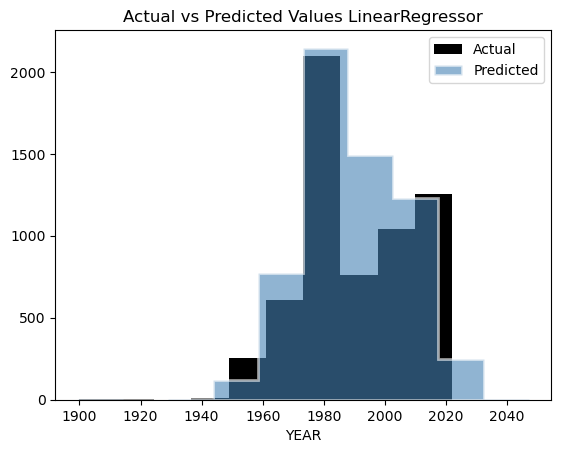

In [307]:
df_predict_LinearRegressor = pd.DataFrame({'Actual': y_test.anneedeplantation.to_numpy(), 'Predicted': pipeline_LinearRegressor.predict(X_test).ravel()})


plt.hist(df_predict_LinearRegressor['Actual'], label='Actual', alpha=1, color = 'black')
plt.hist(df_predict_LinearRegressor['Predicted'], label='Predicted',alpha=0.6, histtype='stepfilled', color='steelblue', edgecolor='white', linewidth=2)

plt.xlabel('YEAR')
plt.title('Actual vs Predicted Values LinearRegressor')
plt.legend()

plt.show()

#### DecisionTreeRegressor

In [1270]:
#REGRESSION !!!DIFF DEPTH!!!

# List of values to try for max_depth:
max_depth_range = list(range(1, 25))

# List to store the average RMSE for each value of max_depth:
r2_test_list = []
r2_train_list = []

for depth in max_depth_range:
    
    reg = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    reg.fit(X_train, y_train)    
    
    score = reg.score(X_test, y_test)
    r2_test_list.append(score)
    
    # Bad practice: train and test the model on the same data
    score = reg.score(X_train, y_train)
    r2_train_list.append(score)

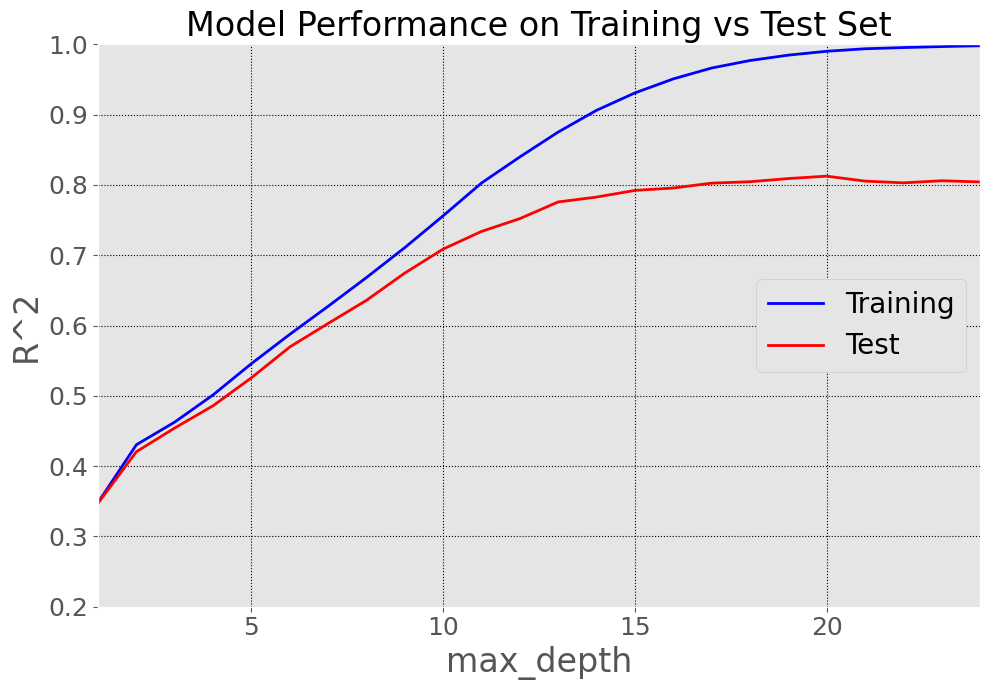

In [1271]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7), facecolor = 'white');

ax.plot(max_depth_range,
        r2_train_list,
        lw=2,
        color='b',
        label = 'Training')

ax.plot(max_depth_range,
        r2_test_list,
        lw=2,
        color='r',
        label = 'Test')

ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_ylim(.2,1)

ax.legend(loc = 'center right', fontsize = 20, framealpha = 1)


ax.set_title('Model Performance on Training vs Test Set', fontsize = 24)


temp = ax.get_xlim()
temp1 = ax.get_ylim()

fig.tight_layout()
#fig.savefig('images/max_depth_vs_R2_Best_Model.png', dpi = 300)

In [1287]:
#FIT
reg = DecisionTreeRegressor(max_depth = 12, random_state = 0)
reg.fit(X_train, y_train)

#PREDICTION TEST
y_pred = reg.predict(X_test)
score = reg.score(X_test, y_test)
print(score)

0.7520624921802023


In [1288]:
df_predict_trees = pd.DataFrame({'Actual': y_test.anneedeplantation.to_numpy(), 'Predicted': y_pred})



plt.hist(df_predict_trees['Actual'], label='Actual')
plt.hist(df_predict_trees['Predicted'], label='Predicted', alpha=0.4)

plt.xlabel('YEAR')
plt.title('Actual vs Predicted Values DecisionTreeRegressor')
plt.legend()

plt.show()

,Actual,Predicted
0,1960.0,1982.595276
1,1960.0,1971.142857
2,1977.0,1982.595276
3,1975.0,1969.274194
4,2003.0,2003.076923
...,...,...
5746,1999.0,1997.412281
5747,1976.0,1975.140741
5748,1975.0,1976.216049
5749,1970.0,1974.400000


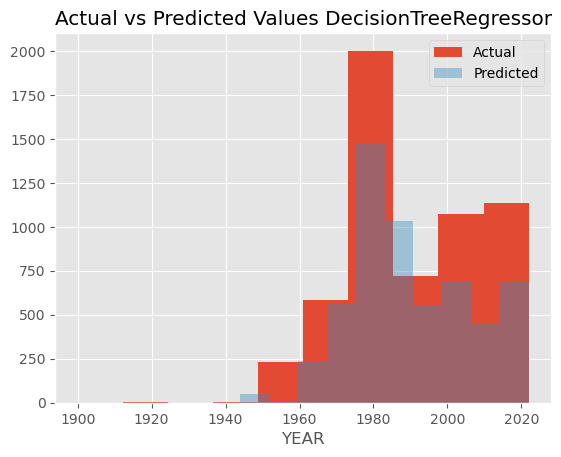

#### Random Forest Regression

In [1290]:
# features = ['sous_categorie', 'sous_categorie_desc','adr_secteur', 'bien_reference', 'stadededeveloppement','hauteurarbre', 'lat', 'long']
# X = df_res.loc[:, features]
# y = df_res.loc[:, ['anneedeplantation']]

X  = df_numeric.loc[:, df_numeric.columns !=  'anneedeplantation']
y = df_numeric.loc[:, ['anneedeplantation']]

In [1292]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)

c:\Users\eduard.vlasov\AppData\Local\anaconda3\envs\arbres\Lib\site-packages\sklearn\base.py:1215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [1293]:
# Calculate the mean absolute error (mae)

predictions = rf.predict(X_test)
errors = abs(predictions - y_test.anneedeplantation.to_numpy())
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.46 degrees.


In [1294]:
# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / y_test.anneedeplantation.to_numpy())

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.88 %.


In [1295]:
df_predict_RFR = pd.DataFrame({'Actual': y_test.anneedeplantation.to_numpy(dtype=list), 'Predicted': predictions})
df_predict_RFR

,Actual,Predicted
0,1960.0,1977.78
1,1960.0,1965.42
2,1977.0,1977.28
3,1975.0,1975.32
4,2003.0,2002.88
...,...,...
5746,1999.0,1999.00
5747,1976.0,1976.00
5748,1975.0,1975.30
5749,1970.0,1972.21


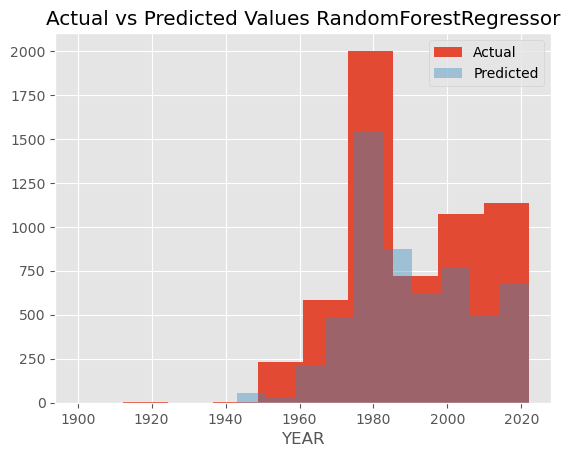

In [1296]:
plt.hist(df_predict_RFR['Actual'], label='Actual')
plt.hist(df_predict_RFR['Predicted'], label='Predicted', alpha=0.4)

plt.xlabel('YEAR')
plt.title('Actual vs Predicted Values RandomForestRegressor')
plt.legend()


#### Linear Regression

In [1297]:
df_numeric = df_res.select_dtypes(include='number')

In [1298]:
X  = df_numeric.loc[:, df_numeric.columns !=  'anneedeplantation']
y = df_numeric.loc[:, ['anneedeplantation']]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [1299]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [1300]:
r_sq = model.score(X_train, y_train)
print(r_sq)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

0.42321934795934246
intercept: [2193.35108231]
slope: [[ 2.15512936e-04  6.48658645e-05  6.48658856e-05 -3.96384359e-02
   9.73260739e-01 -1.05186142e-04 -3.06999587e-01  6.48658860e-05
   1.47364949e-02  6.19933109e+00 -2.95676489e+00 -8.70151965e-01
   1.43259955e+01 -1.47437106e+02]]


In [1301]:
predictions = model.predict(X_test)

In [1302]:
df_predict_LINEAR = pd.DataFrame({'Actual': y_test.anneedeplantation.to_numpy(), 'Predicted': predictions.ravel()})
df_predict_LINEAR

,Actual,Predicted
0,2014.0,2007.062102
1,1984.0,1986.899832
2,2016.0,2018.698157
3,2005.0,1990.689452
4,2015.0,2000.130973
...,...,...
6024,1997.0,1991.769992
6025,1982.0,1999.338588
6026,1975.0,1989.114924
6027,1976.0,1979.761250


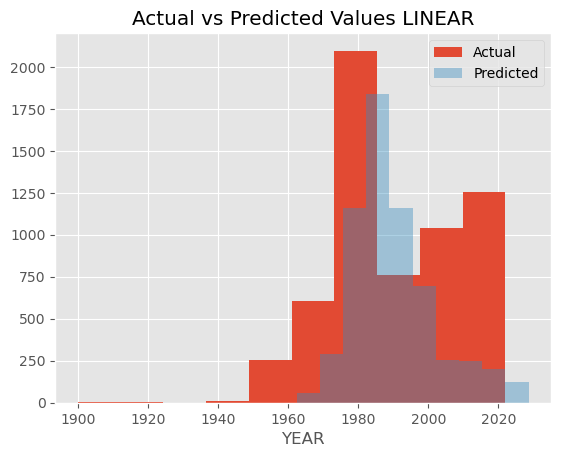

In [1303]:
plt.hist(df_predict_LINEAR['Actual'], label='Actual')
plt.hist(df_predict_LINEAR['Predicted'], label='Predicted', alpha=0.4)

plt.xlabel('YEAR')
plt.title('Actual vs Predicted Values LINEAR')
plt.legend()

plt.show()

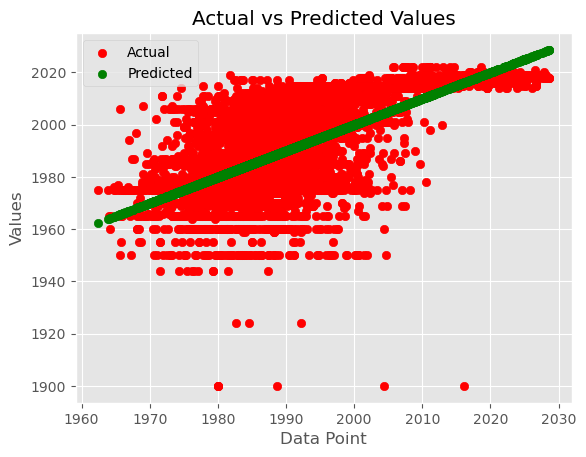

In [1324]:
plt.scatter(predictions, df_predict_LINEAR.Actual, color='red', label='Actual')
plt.scatter(predictions, df_predict_LINEAR.Predicted, color='green', label='Predicted')

# Adding labels and title
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()